<a href="https://colab.research.google.com/github/imdineshkumar24/Cricket_shot_Classification/blob/main/cricket_shots_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [56]:
data_dir = '/content/drive/MyDrive/cricket dataset/cricket_shots_data/data'

In [59]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

ds = datagen.flow_from_directory(
        data_dir,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 4732 images belonging to 4 classes.


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [60]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4732 files belonging to 4 classes.
Using 3786 files for training.


In [61]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4732 files belonging to 4 classes.
Using 946 files for validation.


In [62]:
class_names = train_ds.class_names
print(class_names)

['drive', 'legglance-flick', 'pullshot', 'sweep']


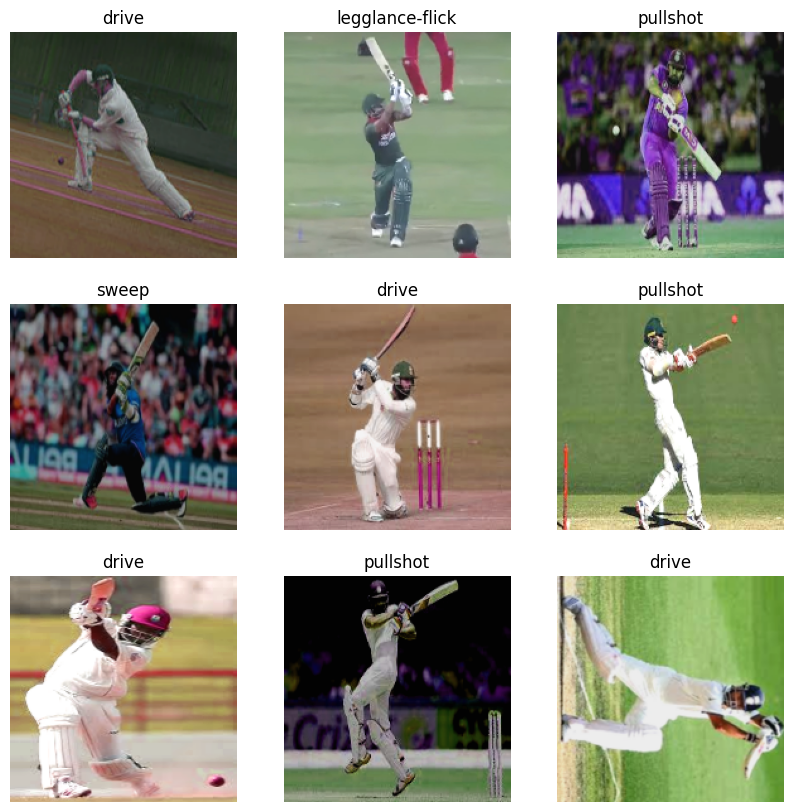

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [64]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [65]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [66]:
normalization_layer = layers.Rescaling(1./255)

In [67]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.029027387 1.0


In [68]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [69]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 45, 45, 64)       

In [71]:
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
119/119 [==============================] - 189s 2s/step - loss: 1.0992 - accuracy: 0.5338 - val_loss: 0.8041 - val_accuracy: 0.6734
Epoch 2/10
119/119 [==============================] - 156s 1s/step - loss: 0.5239 - accuracy: 0.8127 - val_loss: 0.5520 - val_accuracy: 0.7949
Epoch 3/10
119/119 [==============================] - 154s 1s/step - loss: 0.2895 - accuracy: 0.8936 - val_loss: 0.4874 - val_accuracy: 0.8372
Epoch 4/10
119/119 [==============================] - 169s 1s/step - loss: 0.1426 - accuracy: 0.9519 - val_loss: 0.5602 - val_accuracy: 0.8330
Epoch 5/10
119/119 [==============================] - 155s 1s/step - loss: 0.0751 - accuracy: 0.9731 - val_loss: 0.5900 - val_accuracy: 0.8647
Epoch 6/10
119/119 [==============================] - 153s 1s/step - loss: 0.0431 - accuracy: 0.9857 - val_loss: 0.6640 - val_accuracy: 0.8573
Epoch 7/10
119/119 [==============================] - 156s 1s/step - loss: 0.0274 - accuracy: 0.9923 - val_loss: 0.7837 - val_accuracy: 0.8636

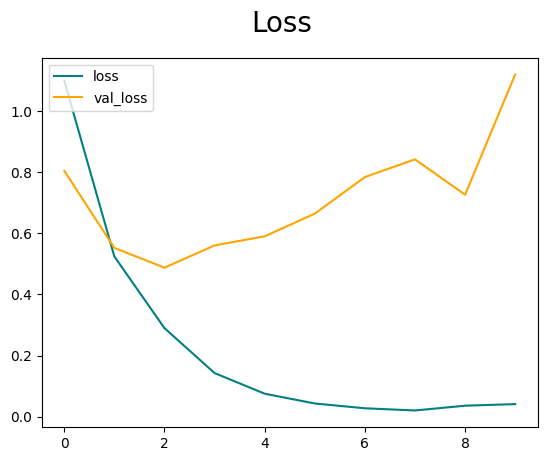

In [72]:
# Plot Performance
fig = plt.figure()
plt.plot(history.history['loss'], color='teal', label='loss')
plt.plot(history.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

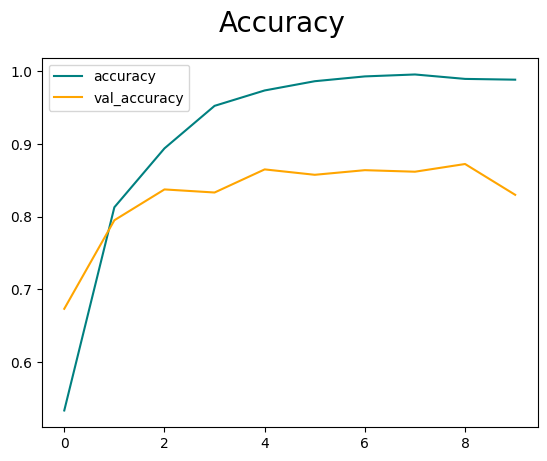

In [73]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color='teal', label='accuracy')
plt.plot(history.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [77]:
import PIL
import PIL.Image
from tensorflow.keras.preprocessing import image
img_path = '/content/drive/MyDrive/cricket dataset/cricket_shots_data/data/legglance-flick/legglance1.png'
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)

In [78]:
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 1s 551ms/step
This image most likely belongs to legglance-flick with a 100.00 percent confidence.


In [91]:
model.save('cricket_shot_classification_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [92]:
model1 = tf.keras.models.load_model('cricket_shot_classification_model.h5')

In [ ]:
#download any image and make a classification

In [93]:
img_path = '/content/sample image 2.jpeg'
img = tf.keras.utils.load_img(
    img_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 152ms/step


In [94]:
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to pullshot with a 100.00 percent confidence.
